<a href="https://machinelearningmastery.com/building-a-logistic-regression-classifier-in-pytorch/">Inspired By...</a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets

In [4]:
# loading training data
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True
                              )

# loading test data
test_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor(),
                              )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 9912422/9912422 [00:23<00:00, 426452.26it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 28881/28881 [00:00<00:00, 64703.64it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:10<00:00, 157874.77it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████| 4542/4542 [00:00<00:00, 115779.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# check dataset numbers
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


In [6]:
# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])

label of the first taining sample:  5
label of the second taining sample:  0


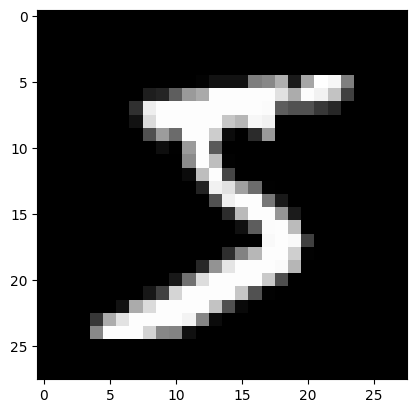

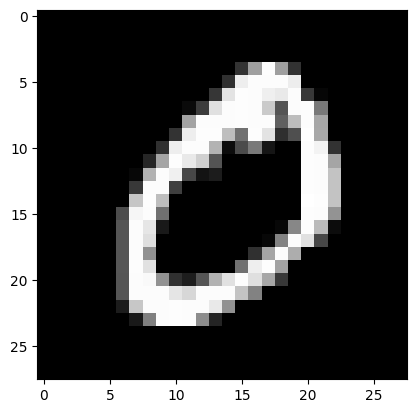

In [9]:
# see on our data
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [10]:
from torch.utils.data import DataLoader

# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [12]:
# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):
    # define __init__
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [13]:
# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [16]:
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

epochs = 50
Loss = []
acc = []

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.111884593963623. Accuracy: 73.61
Epoch: 1. Loss: 2.0374419689178467. Accuracy: 76.73
Epoch: 2. Loss: 2.0341532230377197. Accuracy: 78.98
Epoch: 3. Loss: 1.9814883470535278. Accuracy: 80.23
Epoch: 4. Loss: 1.928508996963501. Accuracy: 81.01
Epoch: 5. Loss: 1.9560739994049072. Accuracy: 81.51
Epoch: 6. Loss: 1.9012221097946167. Accuracy: 82.04
Epoch: 7. Loss: 1.8536741733551025. Accuracy: 82.47
Epoch: 8. Loss: 1.8118363618850708. Accuracy: 82.86
Epoch: 9. Loss: 1.8363531827926636. Accuracy: 83.09
Epoch: 10. Loss: 1.8112143278121948. Accuracy: 83.33
Epoch: 11. Loss: 1.842943549156189. Accuracy: 83.51
Epoch: 12. Loss: 1.8165593147277832. Accuracy: 83.62
Epoch: 13. Loss: 1.8652626276016235. Accuracy: 83.76
Epoch: 14. Loss: 1.7983989715576172. Accuracy: 83.9
Epoch: 15. Loss: 1.7930024862289429. Accuracy: 84.04
Epoch: 16. Loss: 1.7447086572647095. Accuracy: 84.16
Epoch: 17. Loss: 1.777178406715393. Accuracy: 84.28
Epoch: 18. Loss: 1.7925136089324951. Accuracy: 84.36
Epoch: 1

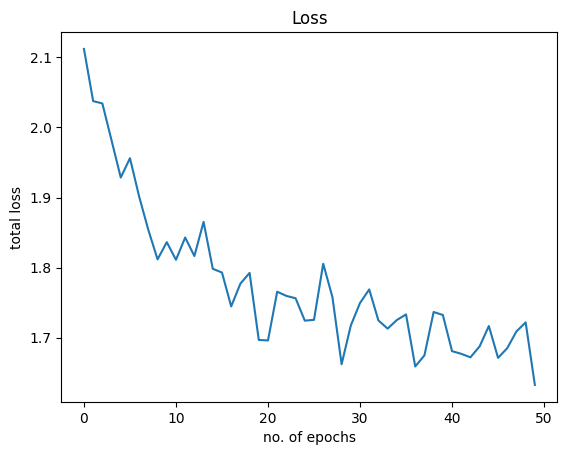

In [17]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

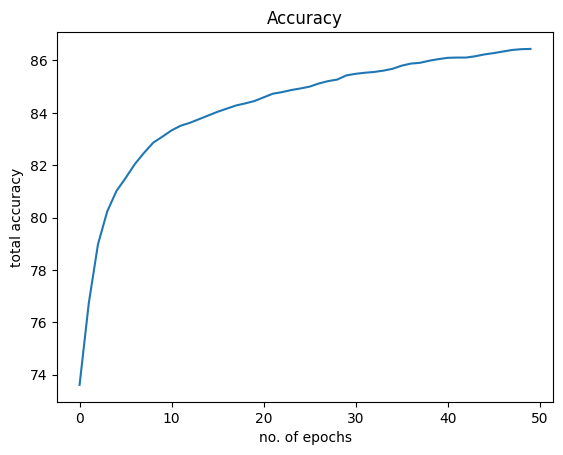

In [18]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()